<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/SimulationVsAnlalytical_RC_fixedStepEulerMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Analytical Solution vs Simulation for RC Circuit</h1></b>

Dr. Bingsen Wang

6/8/2025
</center>

#Python Code

0
0
50
100
150
0


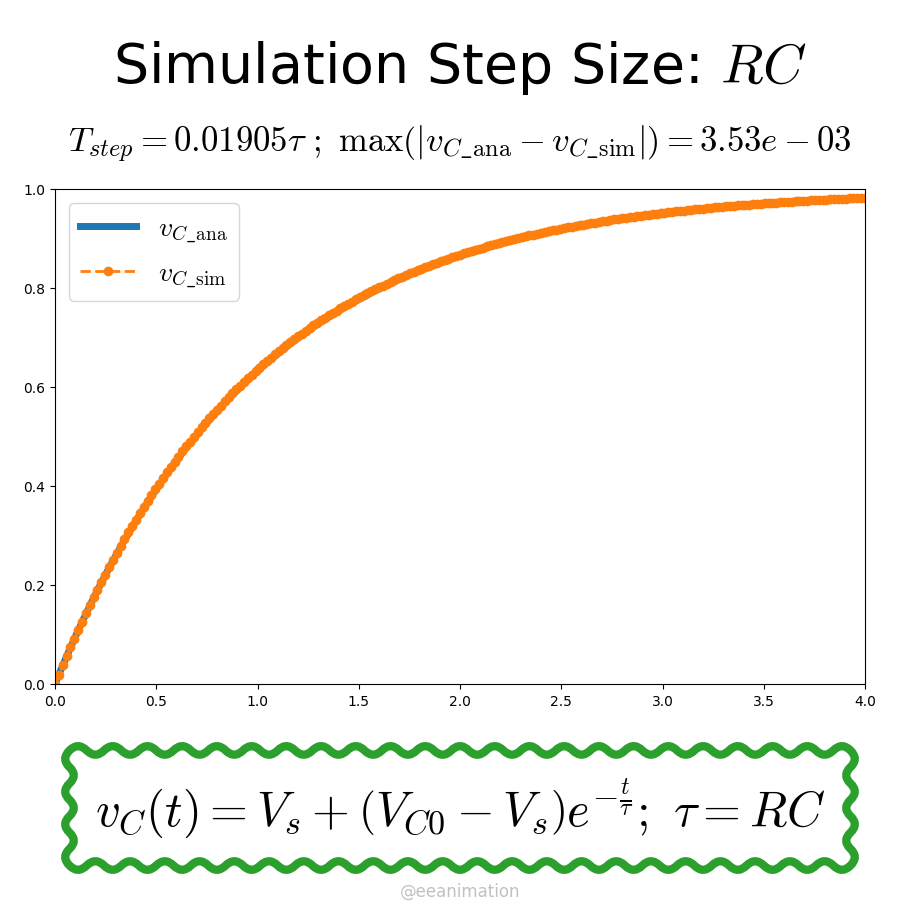

In [32]:
from matplotlib import pyplot,animation,cm
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})
def vc_ana(t,tau,vc0,vs):
  return vs+(vc0-vs)*np.exp(-t/tau)

def euler_method(f, y0, t_span, dt,args):
  t = np.arange(t_span[0], t_span[1]+dt, dt)
  y = np.zeros((len(y0), len(t)))
  y[:, 0] = y0
  for i in range(len(t) - 1):
      y[:, i + 1] = y[:, i] + dt * f(t[i], y[:, i],*args)
  return t, y

def sys(t,x,vs,tau):
  vc=x;
  dvcdt =  (vs-vc)/tau
  return dvcdt

Nf=200
tau =1; vs=1;vc0=0
tf=4*tau
t_ana=np.linspace(0,tf,400)
vc_ana_t=vc_ana(t_ana,tau,vc0,vs)
cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-1.2,1.2],ylim=[-1.2,1.25]);ax.axis('off')
ax1 = fig.add_axes([.05,.25,.9,.55],xlim=[0,4*tau],ylim=[0,vs],fc='none');#ax1.axis('off')
ax.text(0,1.05,"Simulation Step Size: $RC$",size=40,ha='center')
ax.text(0,-.925,r'$v_C(t)= V_s+\left(V_{C0} - V_s\right)e^{-\frac{t}{\tau}};\ \tau=RC$',
        size=35,ha='center',va='center',multialignment='left',
        bbox=dict(boxstyle='roundtooth',pad=.7,facecolor='none',edgecolor=cl[2],lw=6))
ax1.plot(t_ana,vc_ana_t,c=cl[0],lw=5,label=r'$v_{C\_\text{ana}}$')
lines=[ax1.plot([],[],'--o',c=cl[1],lw=2,label=r'$v_{C\_\text{sim}}$')[0]]
ax1.legend(loc='upper left',fontsize=20)
txts= [ax1.text(2,1.05,'',size=25,va='bottom',ha='center')]
def animate(i):
  if i%50==0: print(i)
  dt=tf/(Nf+10-i)
  t, vc_sim_t = euler_method(sys, [vc0], (0,tf), dt,args=(vs, tau))
  vc_ana_t=vc_ana(t,tau,vc0,vs)
  err = max(abs(vc_ana_t-vc_sim_t[0]))
  lines[0].set_data(t,vc_sim_t)
  txts[0].set_text(r'$T_{step}=%.5f\tau\ ;\ \max\left(|v_{C\_\text{ana}}-v_{C\_\text{sim}}|\right)=%.2e\ $'%(dt,err))
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
anim.save("SimulationAnalytical_stepsize.mp4",writer=animation.FFMpegWriter(fps=25),dpi=200)